In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [22]:
np.random.rand(200, 1).shape

(200, 1)

In [23]:
np.random.rand()

0.5363063407118165

In [24]:
np.random.randn()

0.1967423565290726

X = 6 * np.random.rand(200, 1) - 3

np.random.rand(200, 1) generates a 2D array of shape (200, 1) with random values uniformly distributed between 0 and 1.
Multiplying by 6 scales these values to be between 0 and 6.
Subtracting 3 shifts these values to be between -3 and 3.
So, X is an array of 200 random values uniformly distributed between -3 and 3.
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

This line creates the target variable y by applying a quadratic equation to the values of X.
0.8 * X**2 adds a quadratic component to the relationship, indicating a parabolic curve with a coefficient of 0.8.
0.9 * X adds a linear component with a coefficient of 0.9.
+ 2 is a constant that shifts the entire curve upwards by 2 units.
np.random.randn(200, 1) generates random values from a normal distribution (mean 0, standard deviation 1) with the same shape as X, adding some noise to the data, simulating real-world imperfections in the measurements.
Purpose of this Code:

The generated data (X and y) simulates a quadratic relationship with some randomness (noise) added to y.
This kind of synthetic data is often used in machine learning or statistics to test algorithms, especially in regression problems, to model and predict the relationship between X (input) and y (output). The noise helps make the scenario more realistic, as most real-world data is not perfectly clean.

`Combining Uniform and Normal Distributions`
Uniform for X ensures a wide and balanced coverage of the input space, which is crucial for accurately modeling and understanding the full behavior of the relationship.
Normal for y adds realistic randomness, making the synthetic data more similar to what we would expect in real-world scenarios where data isn't perfect but has some level of noise or error.

In [25]:
x = 6*np.random.rand(200,1)-3
y = 0.8 * x**2 + 0.9 * x  + 2 + np.random.randn(200,1)

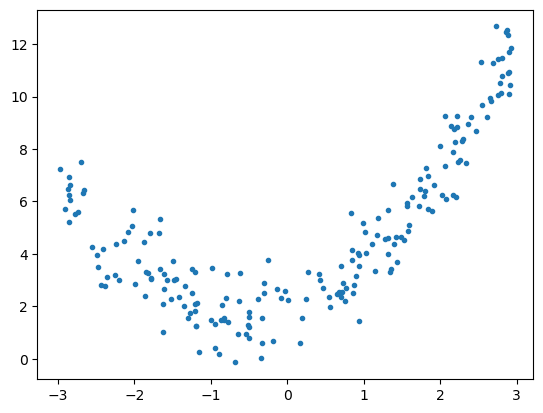

In [26]:
plt.plot(x,y,'.')

In [27]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state = 2)

## Simple LR on non-linear data

In [28]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
r2_score(ytest, ypred)

0.50403116237448

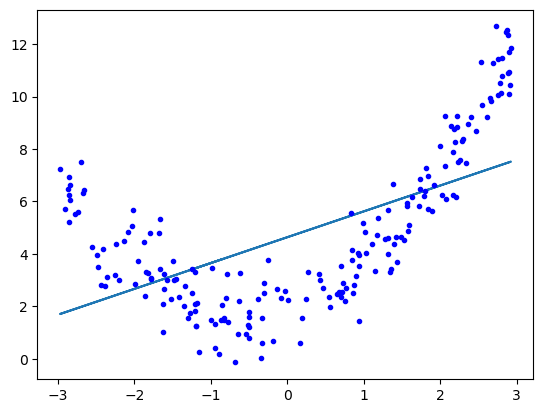

In [29]:
plt.plot(xtrain,lr.predict(xtrain))
plt.plot(x,y,'b.')

## Polynomial LR

In [30]:
poly = PolynomialFeatures(degree = 2, include_bias = True)# include_bias = True adds an extra column of 1's
xtrain_trans = poly.fit_transform(xtrain)
xtest_trans = poly.transform(xtest)

In [31]:
xtrain_trans[0] # transformation is such that x^0 and x^2 terms are added

array([ 1.        , -1.2124742 ,  1.47009368])

In [32]:
xtrain[0]

array([-1.2124742])

In [33]:
# now fitting LR on the polynomially transformed data
lr = LinearRegression()
lr.fit(xtrain_trans, ytrain)
ypred_trans = lr.predict(xtest_trans)

In [34]:
r2_score(ytest, ypred_trans)

0.9183075632073594

In [35]:
lr.coef_, lr.intercept_

(array([[0.        , 0.88689966, 0.82611633]]), array([1.99994505]))

In [36]:
xnew=np.linspace(-3, 3, 200).reshape(200, 1)
xnew_poly = poly.transform(xnew)

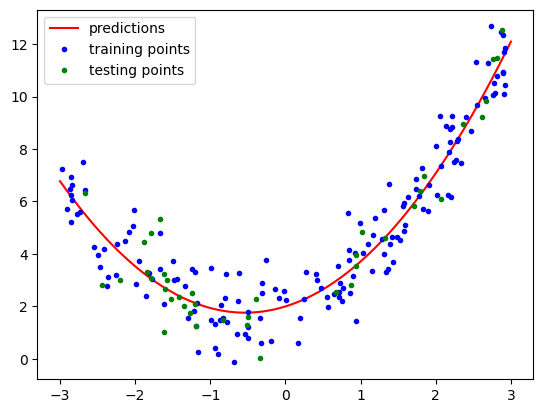

In [46]:
y_new = lr.predict(xnew_poly)
plt.plot(xnew,y_new,'r-', label = 'predictions')
plt.plot(xtrain, ytrain,'b.', label = 'training points')
plt.plot(xtest, ytest,'g.', label = 'testing points')
plt.legend()
plt.show()

x^0 + x^1 + x^2

x^0 + x^1 + xy + y^2

In [55]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

In [65]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    print(polynomial_regression[0].powers_)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(xtrain, ytrain, "b.", linewidth=3)
    plt.plot(xtest, ytest, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    #plt.axis([-3, 3, 0, 10])
    plt.show()

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]


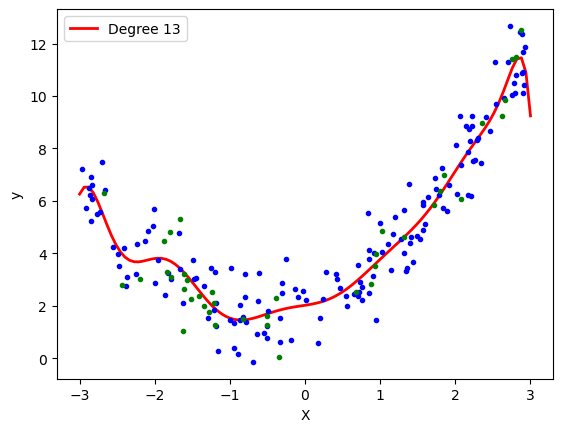

In [66]:
polynomial_regression(13)

Now using GD for fitting polynomial regression 

Abhi tk we were using OLS yani LinearRegression class to perform polynomial regression

Polynomial regression koi alag si chiz nhi h it's just that hum linear jo euation thi line ki y = mx + b, usko polynomial equation m transform kr rhe h , something like y = m1x + m2x^2 + b for a degree 2 polynomial .

yani now in above equation we are supposed to find the values of m1, m2, b. 

`IMPORTANT POINT` - its still linear regression since the degree of the coeficients w.r.t. y is still linear.

`The term "linear" in linear regression refers to the linearity of the relationship between the coefficients and the output variable 
𝑦
y, not the input variables.`

degree is defined such that kisi bhi polyomial equation ki kisi bhi term m power maximum isi degree tk pahuch sakti h


In [80]:
# Now using GD for fitting polynomial regression
poly = PolynomialFeatures(degree = 2)
scale = StandardScaler()
sgd = SGDRegressor(max_iter = 100)

pipe = Pipeline(
[('poly',poly),('scaler',scale),('sgdReg',sgd)]
)

pipe.fit(xtrain, ytrain.ravel())
pred = pipe.predict(xtest)
print(pipe[2].coef_, pipe[2].intercept_)
r2_score(ytest, pred)

[0.         1.57402759 2.2969274 ] [4.87227322]


0.9181965585142555

In [81]:
x.shape

(200, 1)

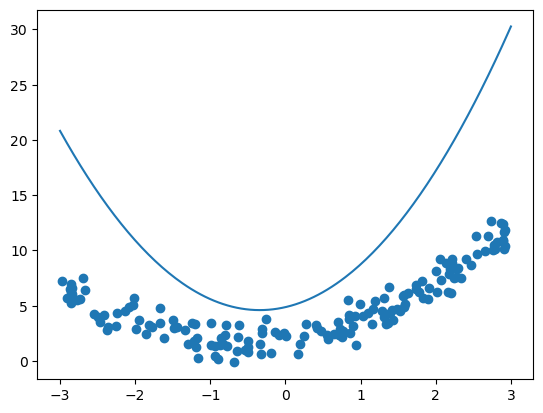

In [85]:
# Now plotting the graph
xinput = np.linspace(-3,3,x.shape[0]).reshape(-1,1)
# isko polynomial features m transform kr rhe h just to get the y predictions from the transformed x features 
xinput_trans = pipe[0].transform(xinput)
yinput = pipe[2].predict(xinput_trans)

plt.scatter(xtrain,ytrain)
plt.plot(xinput,yinput)